##Importing Libraries and Setting Up the Environment

In [1]:
# Importing essential libraries for numerical operations and data manipulation
import numpy as np  # for numerical operations on arrays
import pandas as pd  # for handling tabular data (DataFrame)

# Importing visualization libraries for data exploration
import matplotlib.pyplot as plt  # for creating static, animated, and interactive visualizations
%matplotlib inline  # ensures that plots appear within the Jupyter notebook
import seaborn as sns  # high-level interface for creating informative and attractive visualizations

# Importing libraries for model evaluation and preprocessing
from sklearn import metrics  # for various evaluation metrics like accuracy, precision, etc.
from sklearn import preprocessing  # for data preprocessing, such as scaling and encoding
from sklearn.model_selection import cross_val_score  # for evaluating model performance using cross-validation

# Importing specific tools for ROC-AUC analysis
from sklearn.metrics import roc_curve  # for computing ROC curve
from sklearn.metrics import roc_auc_score  # for calculating the area under the ROC curve (AUC)
from sklearn.metrics import RocCurveDisplay  # for plotting ROC curve visualization


##Loading and Exploring the Dataset

In [2]:
# Loading the credit card fraud detection dataset from a CSV file
df = pd.read_csv("/content/drive/MyDrive/Datasets/creditcard.csv")

# Displaying the first 5 rows of the dataset to understand the structure
df.head()  # This gives us an initial view of the data, helping us see the features and sample values


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Displaying detailed information about the dataset, including column names, data types, and missing values
df.info()  # This is useful to check for null values, data types, and overall structure of the dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##Converting the Target Variable to a Categorical Type


In [4]:
# Converting the 'Class' column (target variable) to a categorical data type
# 'Class' represents whether a transaction is fraudulent (1) or legitimate (0)
df['Class'] = df['Class'].astype('category')  # This ensures that the target variable is treated as categorical, optimizing model performance

# Displaying the 'Class' column to verify the changes and inspect the data
df['Class']  # Outputs the 'Class' column after converting to category


,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


##Understanding Class Distribution (Fraud vs Legitimate Transactions)

In [5]:
# Counting the number of legitimate (0) and fraudulent (1) transactions in the dataset
classes = df['Class'].value_counts()  # value_counts() counts the occurrences of each unique value in the 'Class' column

# Calculating the percentage of legitimate transactions
normal_share = classes[0] / df['Class'].count() * 100  # Number of legitimate transactions (class 0) divided by the total number of transactions
print(normal_share)  # Display the percentage of legitimate transactions

# Calculating the percentage of fraudulent transactions
fraud_share = classes[1] / df['Class'].count() * 100  # Number of fraudulent transactions (class 1) divided by the total number of transactions
print(fraud_share)  # Display the percentage of fraudulent transactions


99.82725143693798
0.1727485630620034


##Creating a DataFrame for Class Share (Fraudulent vs Non-Fraudulent Transactions)

In [6]:
# Creating a dictionary that holds the class labels (fraudulent vs non-fraudulent) and their respective percentages
class_share = {'Class': ['fraudulent', 'non_fraudulent'], 'Percentage': [fraud_share, normal_share]}

# Converting the dictionary into a pandas DataFrame for better representation
class_share = pd.DataFrame(class_share)

# Displaying the first few rows of the DataFrame to verify the class distribution
class_share.head()  # Output the DataFrame containing the class labels and their respective percentages


,Class,Percentage
0,fraudulent,0.172749
1,non_fraudulent,99.827251


##Visualizing the Class Distribution (Fraudulent vs Non-Fraudulent Transactions)

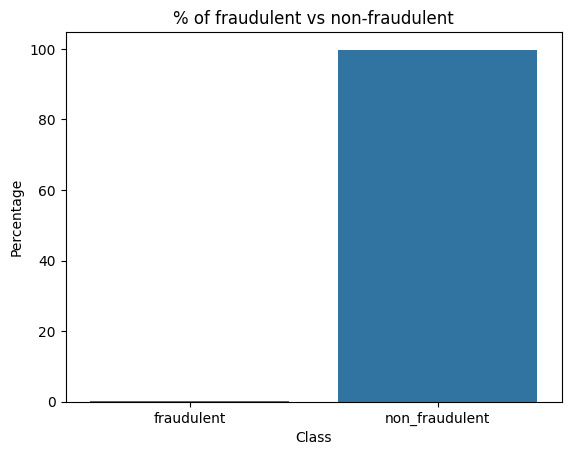

In [7]:
# Creating a bar plot to visualize the percentage of fraudulent and non-fraudulent transactions
sns.barplot(x='Class', y='Percentage', data=class_share)  # 'Class' on x-axis, 'Percentage' on y-axis from the class_share DataFrame

# Adding a title to the plot for better understanding
plt.title('% of fraudulent vs non-fraudulent')  # Title that describes what the plot is showing

# Displaying the plot
plt.show()  # Render the plot in the notebook


##Visualizing the Distribution of Transactions Over Time for Fraudulent and Non-Fraudulent Classes

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


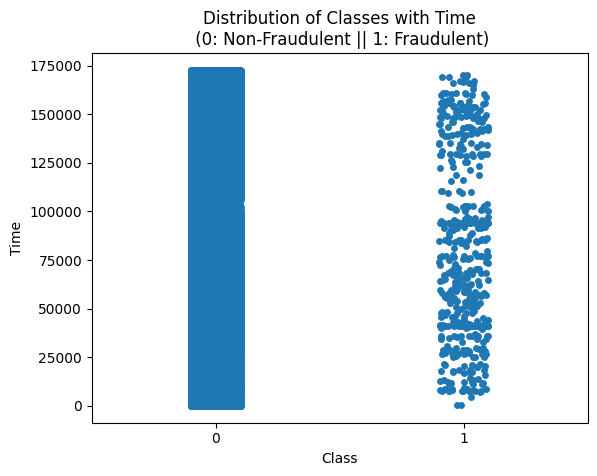

In [8]:
# Creating a strip plot to visualize the distribution of transactions over time for both fraudulent and non-fraudulent classes
sns.stripplot(x='Class', y='Time', data=df)  # 'Class' on the x-axis, 'Time' on the y-axis to observe the time-based distribution of each class

# Adding a title to the plot for clarity
plt.title('Distribution of Classes with Time\n (0: Non-Fraudulent || 1: Fraudulent)')  # Title explaining the plot and the two classes

# Displaying the plot
plt.show()  # Render the plot


##Visualizing the Distribution of Transaction Amounts for Fraudulent and Non-Fraudulent Classes

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


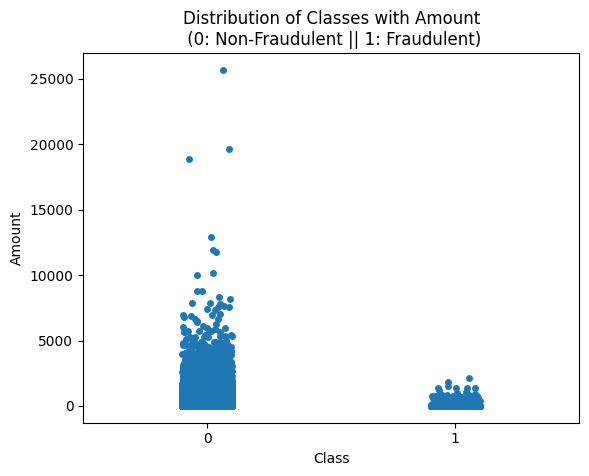

In [9]:
# Creating a strip plot to visualize the distribution of transaction amounts for both fraudulent and non-fraudulent classes
sns.stripplot(x='Class', y='Amount', data=df)  # 'Class' on the x-axis, 'Amount' on the y-axis to observe the distribution of transaction amounts per class

# Adding a title to the plot for clarity
plt.title('Distribution of Classes with Amount\n (0: Non-Fraudulent || 1: Fraudulent)')  # Title explaining the plot and the two classes

# Displaying the plot
plt.show()  # Render the plot


##Dropping the 'Time' Feature from the Dataset

In [10]:
# Dropping the 'Time' column as it may not provide significant information for the model or may introduce noise
df = df.drop('Time', axis=1)  # Dropping the 'Time' column from the DataFrame

# Checking the new shape of the DataFrame to ensure the 'Time' column has been removed
df.shape  # Output the shape of the DataFrame (rows, columns) after dropping the 'Time' feature


(284807, 30)

##Visualizing Feature Correlations Using a Heatmap

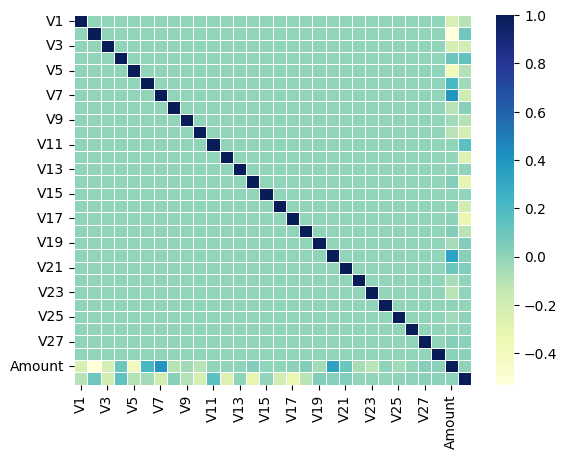

In [11]:
# Creating a heatmap to visualize the correlation matrix of the features in the DataFrame
sns.heatmap(df.corr(), linewidths=0.5, cmap='YlGnBu')  # Correlation matrix from df.corr() with specified linewidths and color map

# Displaying the heatmap
plt.show()  # Render the heatmap


##Defining Features and Target Variable for Model Training

In [12]:
# Defining the target variable (y) as the last column of the DataFrame, which contains the class labels (fraudulent/non-fraudulent)
y = df.iloc[:, -1]  # Target variable extracted from the last column

# Defining the feature set (X) as all columns except the last one
X = df.iloc[:, :-1]  # Features extracted from all columns except the last one


##Splitting the Dataset into Training and Testing Sets

In [13]:
# Importing necessary libraries for model selection and dataset splitting
from sklearn import model_selection
from sklearn.model_selection import train_test_split  # Importing train_test_split for splitting the dataset

# Splitting the dataset into training and testing sets, preserving the proportion of classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)  # 80% training, 20% testing

In [14]:
# Printing the total count for each class in the original dataset
print('Total count for each class:\n', y.value_counts())  # Count of classes in the entire dataset

# Printing the count of each class in the training data
print("\nCount of each class in train data:\n", y_train.value_counts())  # Count of classes in the training set

# Printing the count of each class in the testing data
print("\nCount of each class in test data:\n", y_test.value_counts())  # Count of classes in the testing set

Total count for each class:
 Class
0    284315
1       492
Name: count, dtype: int64

Count of each class in train data:
 Class
0    227451
1       394
Name: count, dtype: int64

Count of each class in test data:
 Class
0    56864
1       98
Name: count, dtype: int64


##Visualizing Feature Distributions in the Training Set

<ipython-input-15-5523ab614196>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train.columns[n]])
<ipython-input-15-5523ab614196>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train.columns[n]])
<ipython-input-15-5523ab614196>:12: UserWarning: 

`distplot` is a depreca

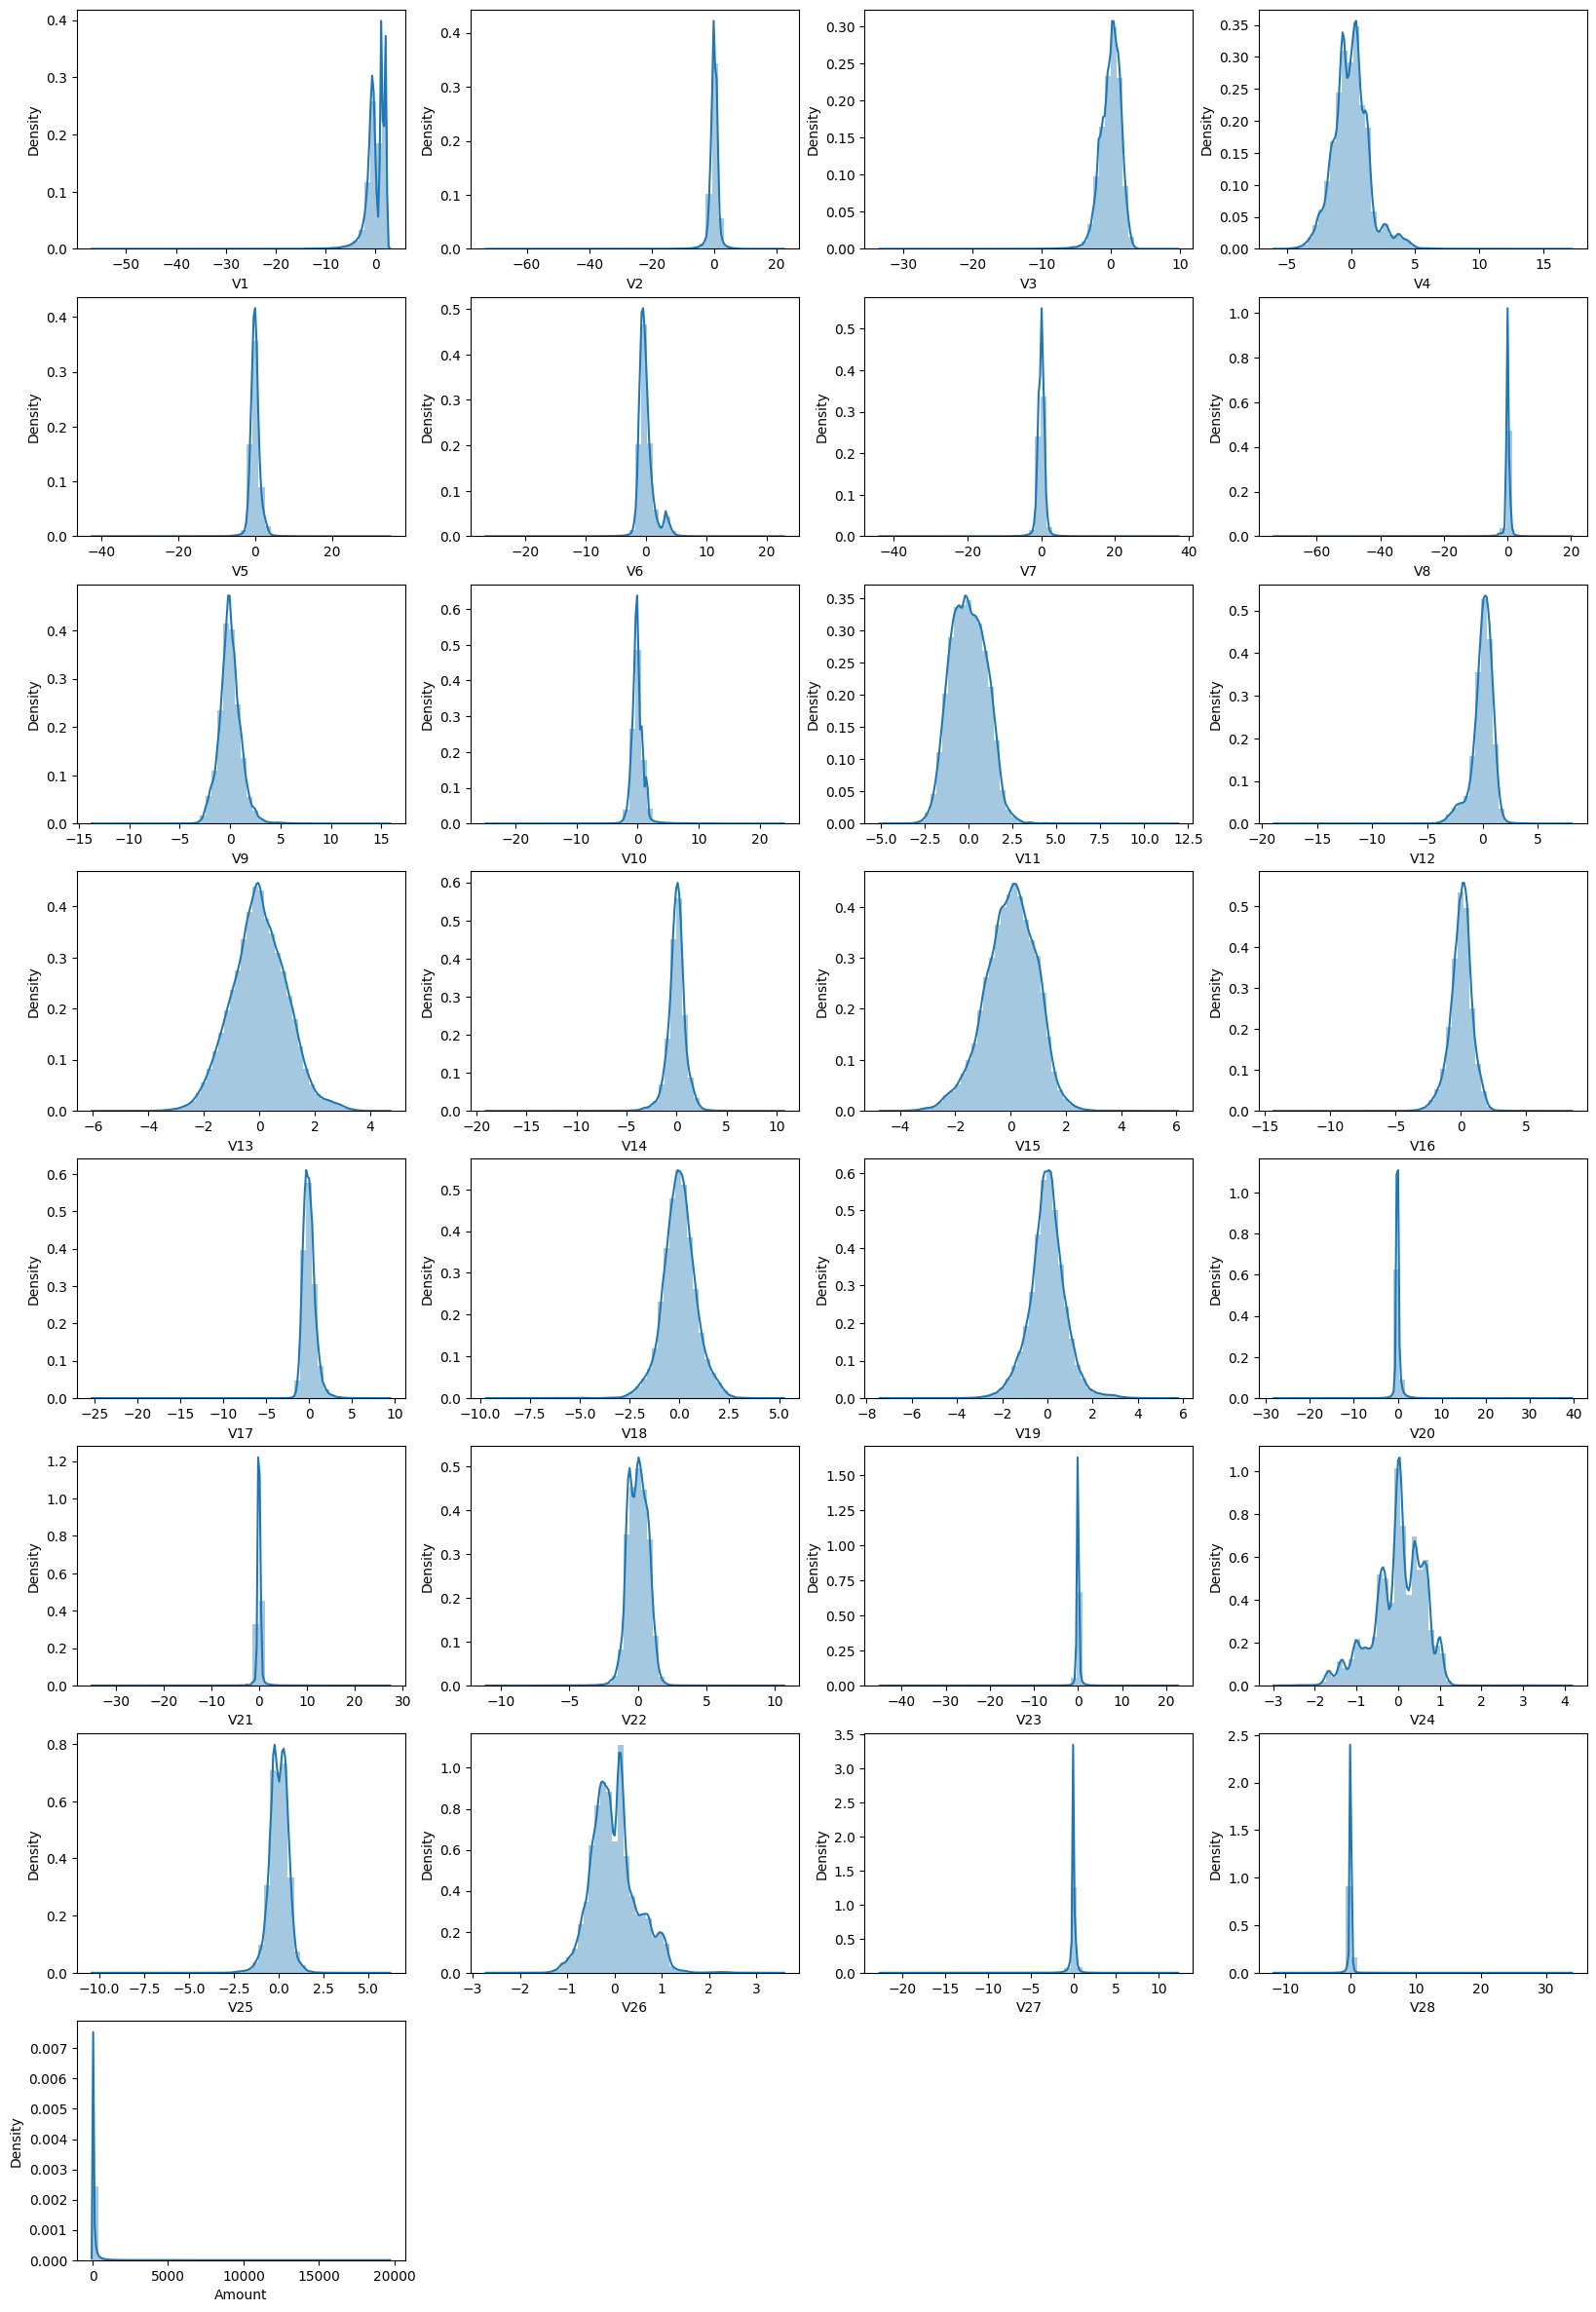

In [15]:
# Creating a list of feature column names from the training set
collist = list(X_train.columns)

# Setting up parameters for plotting
c = len(collist)  # Total number of features
m = 1  # Subplot index for positioning
n = 0  # Counter for iterating through features

# Initializing the figure for subplots with specified size
plt.figure(figsize=(20, 30))

# Looping through each feature to create distribution plots
for i in collist:
    if m in range(1, c + 1):  # Ensuring m is within the range of subplot indices
        plt.subplot(8, 4, m)  # Creating a subplot for the current feature
        sns.distplot(X_train[X_train.columns[n]])  # Plotting the distribution of the current feature
        m = m + 1  # Incrementing subplot index
        n = n + 1  # Incrementing feature index

# Rendering all the distribution plots
plt.show()  # Display the plots


##Transforming Features Using Power Transformation

In [16]:
# Importing the power_transform function for transforming the feature set
from sklearn.preprocessing import power_transform

# Applying Yeo-Johnson power transformation to the training features
X_train = power_transform(X_train, method='yeo-johnson')  # Transforming training features for better normality

# Applying the same transformation to the testing features for consistency
X_test = power_transform(X_test, method='yeo-johnson')  # Transforming testing features


##Converting Transformed Arrays Back to DataFrames

In [17]:
# Storing the original column names from the original feature set
cols = X.columns

# Converting the transformed training features back into a DataFrame
X_train = pd.DataFrame(X_train)  # Creating a DataFrame from the transformed training features
X_train.columns = cols  # Assigning the original column names to the DataFrame

# Converting the transformed testing features back into a DataFrame
X_test = pd.DataFrame(X_test)  # Creating a DataFrame from the transformed testing features
X_test.columns = cols  # Assigning the original column names to the DataFrame


##Visualizing the Distribution of Transformed Features

<ipython-input-18-5523ab614196>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train.columns[n]])
<ipython-input-18-5523ab614196>:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train.columns[n]])
<ipython-input-18-5523ab614196>:12: UserWarning: 

`distplot` is a depreca

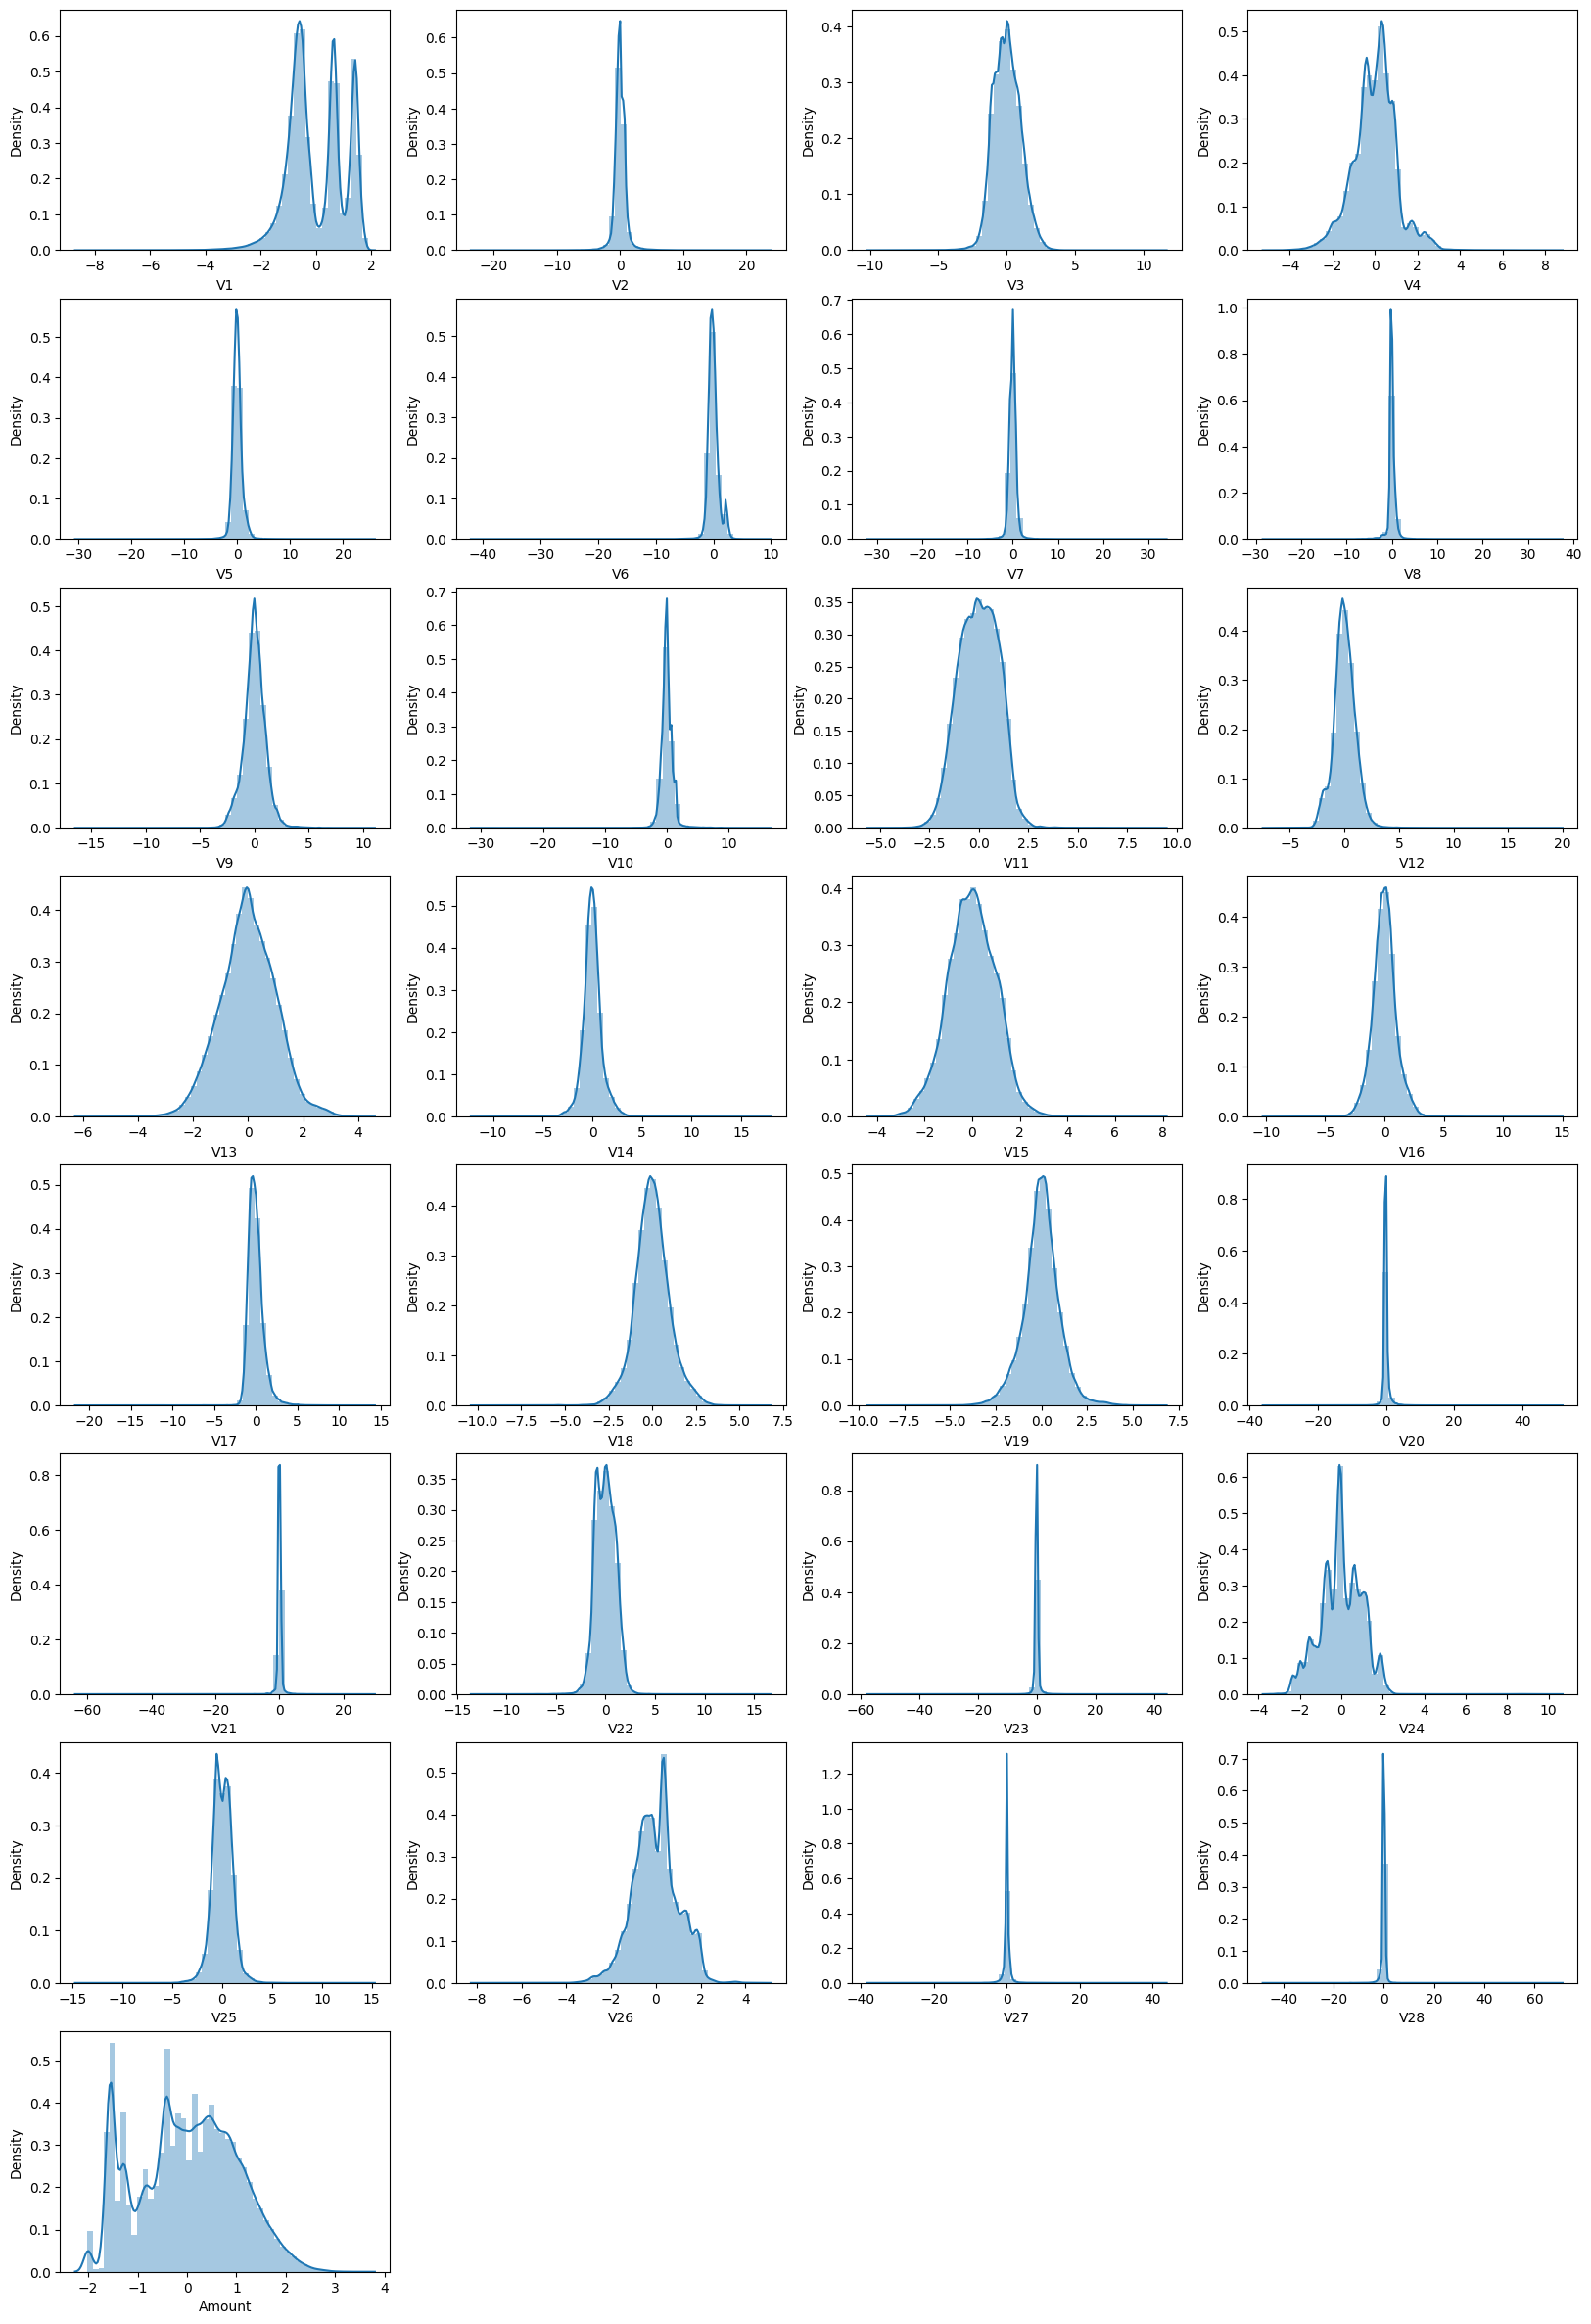

In [18]:
# Creating a list of transformed feature column names from the training set
collist = list(X_train.columns)

# Setting up parameters for plotting
c = len(collist)  # Total number of features
m = 1  # Subplot index for positioning
n = 0  # Counter for iterating through features

# Initializing the figure for subplots with specified size
plt.figure(figsize=(20, 30))

# Looping through each feature to create distribution plots
for i in collist:
    if m in range(1, c + 1):  # Ensuring m is within the range of subplot indices
        plt.subplot(8, 4, m)  # Creating a subplot for the current feature
        sns.distplot(X_train[X_train.columns[n]])  # Plotting the distribution of the current feature
        m = m + 1  # Incrementing subplot index
        n = n + 1  # Incrementing feature index

# Rendering all the distribution plots
plt.show()  # Display the plots


##Defining Functions for ROC Curve Plotting and Model Evaluation

In [19]:
# Importing necessary functions for evaluating model performance
from sklearn.metrics import roc_curve  # For calculating FPR and TPR for ROC curve
from sklearn.metrics import roc_auc_score  # For calculating the AUC score
from sklearn.metrics import classification_report  # For generating classification report

# Function to plot the ROC curve
def plot_roc(fpr, tpr):
    plt.plot(fpr, tpr, color='green', label='ROC')  # Plotting the ROC curve
    plt.plot([0, 1], [0, 1], color='yellow', linestyle='--')  # Adding a diagonal line (no discrimination line)
    plt.title("Receiver Operating Characteristic (ROC) Curve")  # Title of the plot
    plt.xlabel("False Positive Rate")  # Label for X-axis
    plt.ylabel("True Positive Rate")  # Label for Y-axis
    plt.legend()  # Display legend
    plt.show()  # Show the plot

# Function to evaluate the classifier performance
def clf_score(clf):
    prob = clf.predict_proba(X_test)  # Getting predicted probabilities for the test set
    prob = prob[:, 1]  # Selecting probabilities for the positive class (fraud)
    auc = roc_auc_score(y_test, prob)  # Calculating AUC
    print('AUC: %.2f' % auc)  # Printing the AUC score
    fpr, tpr, thresholds = roc_curve(y_test, prob)  # Calculating FPR and TPR for ROC curve
    plot_roc(fpr, tpr)  # Plotting the ROC curve
    predicted = clf.predict(X_test)  # Making predictions on the test set
    report = classification_report(y_test, predicted)  # Generating a classification report
    print(report)  # Printing the classification report
    return auc  # Returning the AUC score for further use


##Logistic Regression

###Importing Logistic Regression and Grid Search for Hyperparameter Tuning

In [20]:
# Importing the linear_model module for various linear regression techniques
from sklearn import linear_model

# Importing the LogisticRegression class for logistic regression model
from sklearn.linear_model import LogisticRegression

# Importing GridSearchCV for hyperparameter tuning through grid search
from sklearn.model_selection import GridSearchCV


###Training Logistic Regression with Different Values of C

In [21]:
# Defining different regularization strengths (C values) to test
num_C = [0.001, 0.01, 0.1, 1, 10, 100]

# Looping through each C value to train and evaluate the Logistic Regression model
for cv_num in num_C:
    # Initializing the Logistic Regression model with L2 penalty and the current C value
    clf = LogisticRegression(penalty='l2', C=cv_num, random_state=0)

    # Fitting the model to the training data
    clf.fit(X_train, y_train)

    # Printing the current C value being tested
    print('C:', cv_num)
    # Printing the coefficients for each feature in the model
    print('Coefficient of each feature:', clf.coef_)
    # Printing the training accuracy of the model
    print('Training accuracy:', clf.score(X_train, y_train))
    # Printing the test accuracy of the model
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')  # Printing an empty line for better readability


C: 0.001
Coefficient of each feature: [[-0.06451213  0.04218053 -0.14822213  0.22596932  0.02600024 -0.03627853
  -0.06125985 -0.11775332 -0.10662233 -0.22864757  0.1860378  -0.23861573
  -0.03000615 -0.40490323 -0.00777475 -0.12925705 -0.11629859 -0.00915348
   0.00498774  0.00924884  0.04493003  0.02312334 -0.02289268 -0.02536797
  -0.00710216  0.00834398 -0.00666134  0.00623157 -0.00251388]]
Training accuracy: 0.9990344313019817
Test accuracy: 0.9989993328885924

C: 0.01
Coefficient of each feature: [[-0.15625815 -0.05624617 -0.24465224  0.53507211  0.01153114  0.04080861
  -0.13331613 -0.21239056 -0.1611028  -0.2411532   0.21234165 -0.44551451
  -0.06642478 -0.65124433 -0.07481625 -0.20383027 -0.02443342  0.03767547
  -0.03619418 -0.01498614  0.07012199  0.08720016 -0.0615613  -0.01596627
   0.00992078  0.01162565 -0.08214594 -0.02016426  0.03893558]]
Training accuracy: 0.9992275450415853
Test accuracy: 0.9992099996488887

C: 0.1
Coefficient of each feature: [[-0.20050467 -0.146658

###Hyperparameter Tuning Using GridSearchCV for Logistic Regression

In [22]:
# Defining a parameter grid for hyperparameter tuning
grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l2"]}  # Testing C values from 0.001 to 1000 with L2 penalty

# Initializing the Logistic Regression model
lsr = LogisticRegression()

# Setting up GridSearchCV for hyperparameter tuning using 3-fold cross-validation and ROC AUC scoring
clf_lsr_cv = GridSearchCV(lsr, grid, cv=3, scoring='roc_auc')

# Fitting the model with the training data to perform grid search
clf_lsr_cv.fit(X_train, y_train)

# Printing the best hyperparameters found through grid search
print("tuned hyperparameters:", clf_lsr_cv.best_params_)
# Printing the best accuracy (ROC AUC score) achieved with those hyperparameters
print("accuracy :", clf_lsr_cv.best_score_)


tuned hpyerparameters: {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.9803913347266079


* Best parameters = {'C': 0.01, 'penalty': 'l2'}

###Evaluating the Optimized Logistic Regression Model

AUC: 0.98


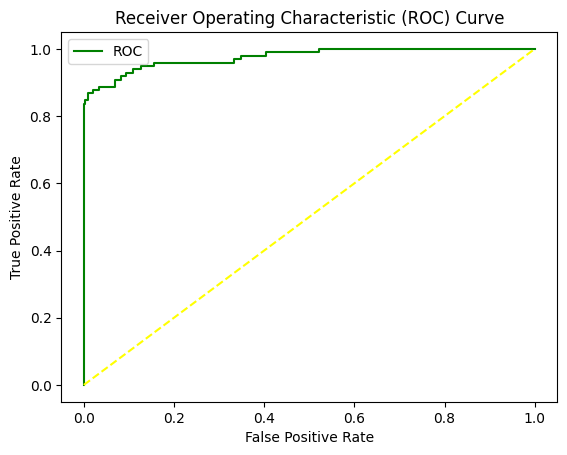

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.62      0.73        98

    accuracy                           1.00     56962
   macro avg       0.94      0.81      0.87     56962
weighted avg       1.00      1.00      1.00     56962



0.9755302303814041

In [23]:
# Creating the Logistic Regression model with the best hyperparameters found
lsr_best = LogisticRegression(penalty='l2', C=0.01, random_state=0)

# Fitting the model on the training data
lsr_clf = lsr_best.fit(X_train, y_train)

# Evaluating the fitted model using the clf_score function defined earlier
clf_score(lsr_clf)


* The AUC score is 0.98 but low recall 0.62.

##K-Nearest Neighbors (KNN) Classifier

###Importing KNN Classifier and Required Libraries, defining the Range of k Values

In [24]:
# Importing KNN Classifier and necessary libraries for evaluation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, mean_squared_error

# Defining the range of k values for KNN (odd integers from 1 to 9)
k_range = np.arange(1, 10, 2)

# Initializing an empty list to store cross-validated scores for each k
scores = []

# Displaying the range of k values for verification
k_range


array([1, 3, 5, 7, 9])

###Training and Evaluating K-Nearest Neighbors (KNN) Classifier

In [25]:
# Looping through each k value in k_range to evaluate KNN classifier
for k in k_range:
    # Initializing the KNN classifier with the current k value
    knn_clf = KNeighborsClassifier(n_neighbors=k)

    # Fitting the KNN classifier on the training data
    knn_clf.fit(X_train, y_train)

    # Performing 3-fold cross-validation and storing the accuracy scores
    score = cross_val_score(knn_clf, X_train, y_train, cv=3, n_jobs=1)

    # Appending the mean accuracy score to the scores list
    scores.append(score.mean())

# Calculating Mean Squared Error (MSE) for each k value
mse = [1 - x for x in scores]  # Lower MSE indicates better performance


###Visualizing the Performance of K-Nearest Neighbors (KNN) Classifier

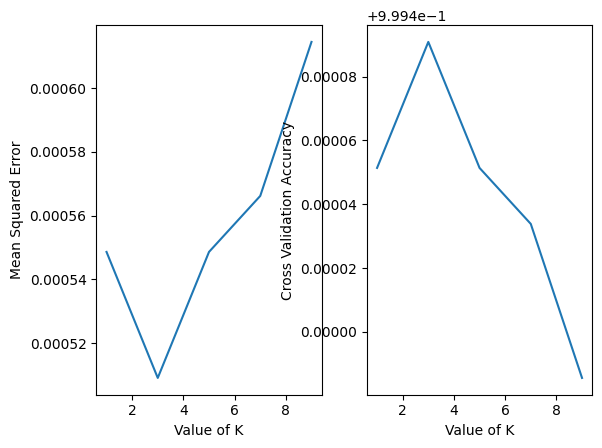

In [26]:
# Creating the first subplot for Mean Squared Error (MSE)
plt.subplot(121)  # 1 row, 2 columns, first subplot
sns.lineplot(x=k_range, y=mse, markers=True, dashes=False)  # Plotting MSE against k
plt.xlabel("Value of K")  # Labeling x-axis
plt.ylabel("Mean Squared Error")  # Labeling y-axis

# Creating the second subplot for Cross-Validation Accuracy
plt.subplot(122)  # 1 row, 2 columns, second subplot
sns.lineplot(x=k_range, y=scores, markers=True, dashes=False)  # Plotting accuracy against k
plt.xlabel("Value of K")  # Labeling x-axis
plt.ylabel("Cross Validation Accuracy")  # Labeling y-axis

# Displaying the plots
plt.show()


* So the best K value is 3 for KNN

###Training the K-Nearest Neighbors (KNN) Classifier with Optimal k Value and Evaluating Performance

AUC: 0.90


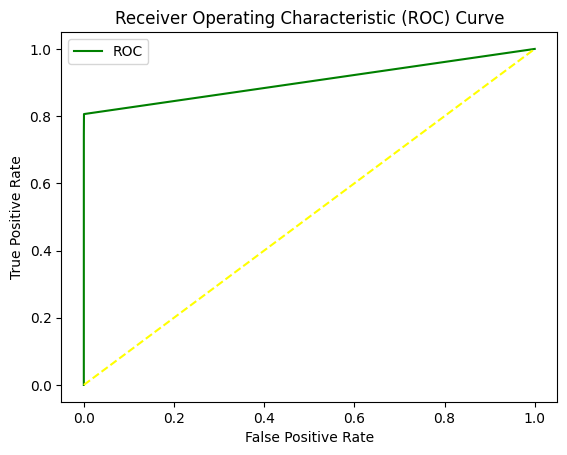

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



0.902998417994097

In [27]:
# Initializing the KNN classifier with the optimal value of k
knn = KNeighborsClassifier(n_neighbors=3)

# Fitting the KNN classifier to the training data
knn_clf = knn.fit(X_train, y_train)

# Evaluating the performance of the KNN classifier using the clf_score function
clf_score(knn_clf)


* The KNN model gives AUC of 0.90 and f1-score is 0.84.

##Decision Tree

###Evaluating Decision Tree Performance Across Different Depths

In [28]:
# Importing necessary libraries for decision tree and pretty printing
from sklearn import tree  # Importing decision tree classifier
from pprint import pprint  # For pretty printing (not used in this code)

In [29]:
# Initializing lists for storing mean cross-validation scores for each depth
depth_score = []  # List to hold mean scores for different depths
dep_rng = [x for x in range(1, 20)]  # Range of maximum depths to evaluate (1 to 19)

# Evaluating the Decision Tree Classifier performance across different depths
for i in dep_rng:
    clf = tree.DecisionTreeClassifier(max_depth=i)  # Initialize Decision Tree with max depth i
    score_tree = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=5, n_jobs=-1)  # Cross-validation
    depth_score.append(score_tree.mean())  # Append the mean score for the current depth

# Printing the mean cross-validation scores for each depth
print(depth_score)

[0.9990827097368825, 0.9992802124251137, 0.999297768219623, 0.9993679913976606, 0.9994733261647173, 0.9994821040619719, 0.9994426035243258, 0.9994294366784437, 0.9994250477298163, 0.9994513814215805, 0.999420658781189, 0.9993943250894249, 0.9993460466545241, 0.9993460466545239, 0.9993153240141325, 0.9992451008360946, 0.999249489784722, 0.9991660997608023, 0.9991660997608023]


###Visualizing Decision Tree Performance Across Different Depths

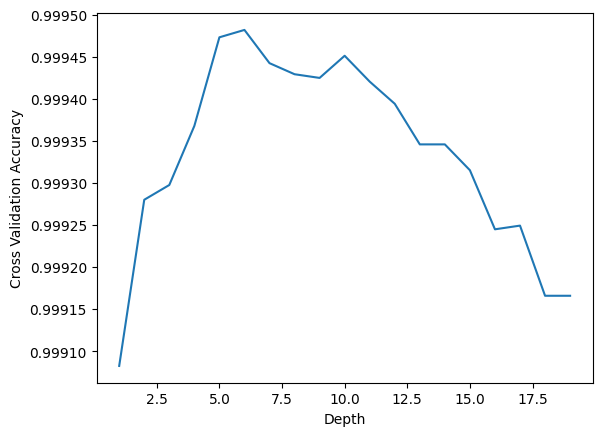

In [30]:
# Visualizing the cross-validation accuracy of the Decision Tree classifier across different depths
sns.lineplot(x=dep_rng, y=depth_score, markers=True, dashes=False)  # Create line plot

# Setting the x-axis and y-axis labels
plt.xlabel("Depth")  # Label for the x-axis
plt.ylabel("Cross Validation Accuracy")  # Label for the y-axis

# Displaying the plot
plt.show()  # Render the plot


* Best value for depth is 6

###Training and Evaluating the Decision Tree Classifier

AUC: 0.89


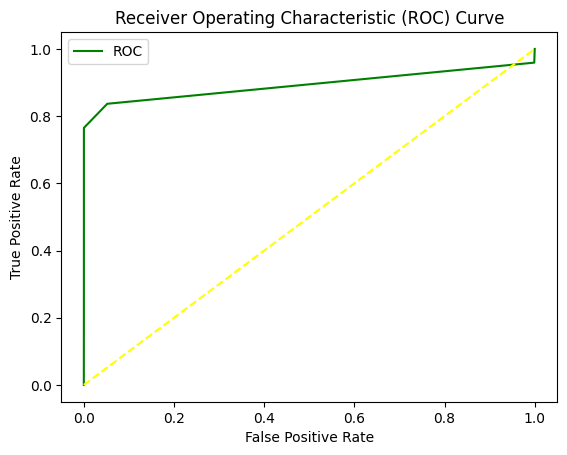

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.77      0.80        98

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



0.8928780484478541

In [31]:
# Initializing the Decision Tree Classifier with optimal maximum depth
dt = tree.DecisionTreeClassifier(max_depth=6)  # Set max_depth to 6 based on previous analysis

# Fitting the classifier on the training data
dt_clf = dt.fit(X_train, y_train)  # Train the Decision Tree classifier

# Evaluating the model performance using the defined clf_score function
clf_score(dt_clf)  # Calculate metrics and display ROC curve


* The AUC score for decision tree is only 0.89, the f1-score is lower than KNN.


##Random Forest Classifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

###Hyperparameter Tuning for the Random Forest Classifier

In [33]:
# Defining hyperparameters for tuning the Random Forest Classifier
param = {'n_estimators': [10, 20, 30, 40, 50],  # Number of trees in the forest
         'max_depth': [2, 3, 4, 7, 9]}  # Maximum depth of the trees

# Initializing the Random Forest Classifier
rfc = RandomForestClassifier()  # Create Random Forest Classifier object

# Setting up Grid Search with Cross-Validation to find the best hyperparameters
clf_rfc_cv = GridSearchCV(rfc, param, cv=5, scoring='roc_auc', n_jobs=-1)  # Create Grid Search object

# Fitting the model to the training data while searching for the best hyperparameters
clf_rfc_cv.fit(X_train, y_train)  # Train the model

# Printing the best hyperparameters and their corresponding accuracy
print("tuned hyperparameters :", clf_rfc_cv.best_params_)  # Output best parameters
print("accuracy :", clf_rfc_cv.best_score_)  # Output AUC score for best parameters


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


tuned hpyerparameters : {'max_depth': 9, 'n_estimators': 50}
accuracy : 0.975374895440917


* So the best parameters for Random forest {'max_depth': 9, 'n_estimators': 50}.


###Training and Evaluating the Final Random Forest Classifier

AUC: 0.98


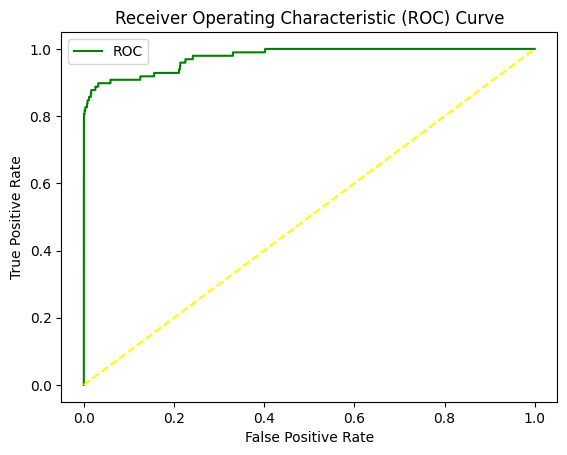

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.69      0.81        98

    accuracy                           1.00     56962
   macro avg       0.99      0.85      0.90     56962
weighted avg       1.00      1.00      1.00     56962



0.976521227159969

In [34]:
# Initializing the Random Forest Classifier with optimal hyperparameters
rf = RandomForestClassifier(max_depth=9, n_estimators=50)  # Set max depth and number of trees

# Fitting the classifier on the training data
RFC_clf = rf.fit(X_train, y_train)  # Train the Random Forest classifier

# Evaluating the model performance using the defined clf_score function
clf_score(RFC_clf)  # Calculate metrics and display ROC curve

* The AUC is 0.98, recall is 0.69

###Training and Optimizing the XGBoost Classifier

In [35]:
# Importing the XGBoost classifier and statistics module
from xgboost import XGBClassifier
from scipy import stats  # Importing statistics module (if needed later)

In [36]:
# Initializing the XGBoost Classifier
xgbst = XGBClassifier()  # Create an instance of the XGBoost classifier

# Defining the hyperparameters for grid search
param_xgb = {
    'n_estimators': [130, 140, 150],  # Number of trees in the ensemble
    'max_depth': [3, 5, 7],            # Maximum depth of each tree
    'min_child_weight': [1, 2, 3]      # Minimum sum of instance weights needed in a child
}

# Running grid search with cross-validation
clf_xgb_cv = GridSearchCV(xgbst, param_xgb, cv=3, scoring='roc_auc', n_jobs=-1)  # Set up grid search
clf_xgb_cv.fit(X_train, y_train)  # Fit the model using the training data

# Outputting the best hyperparameters and accuracy score
print("tuned hyperparameters:", clf_xgb_cv.best_params_)  # Best hyperparameters found
print("accuracy:", clf_xgb_cv.best_score_)  # Best score achieved during grid search


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


tuned hpyerparameters : {'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 130}
accuracy : 0.9843504936661525


* The best parameters for XGboost is {'max_depth': 5, 'min_child_weight': 3 'n_estimators': 130} AUC : 0.9843504936661525


###Training the XGBoost Classifier with Optimized Parameters

AUC: 0.98


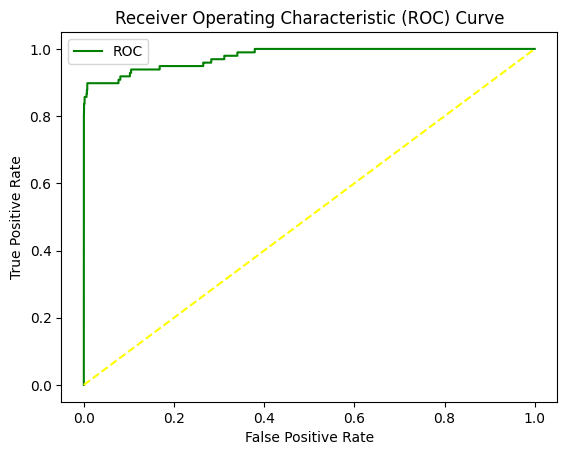

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.74      0.83        98

    accuracy                           1.00     56962
   macro avg       0.97      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



0.9780956065600129

In [37]:
# Initializing the XGBoost Classifier with the optimized hyperparameters
xgbst = XGBClassifier(n_estimators=150, max_depth=5, min_child_weight=3)

# Fitting the classifier to the training data
xgb_clf = xgbst.fit(X_train, y_train)  # Train the model using the training data

# Evaluating the performance of the fitted model using the clf_score function
clf_score(xgb_clf)  # Call the function to print AUC, plot ROC curve, and display classification report


* The AUC is 0.98 with f1-score of 0.83 which is good.
* Out of the models KNN performed the best with AUC of 0.90 and f1-score 0.84

##Applying SMOTE for Balancing Classes in the Training Set

In [38]:
# Importing the SMOTE class from imbalanced-learn for oversampling the minority class
from imblearn.over_sampling import SMOTE

# Creating an instance of SMOTE to generate synthetic samples
sm = SMOTE()

# Applying SMOTE to the training data to balance the classes
X_sm, y_sm = sm.fit_resample(X_train, y_train)  # Generate synthetic samples for the minority class


##Verifying the Results of SMOTE Application

In [39]:
# Importing Counter from collections to count occurrences of each class in the target variable
from collections import Counter

# Printing the counts of each class in the resampled target variable to verify class balance
print('Resampled dataset shape %s' % Counter(y_sm))

# Printing the shape of the resampled feature set to understand the new dataset structure
print(X_sm.shape)  # Shape of the features after SMOTE
print(y_sm.shape)  # Shape of the target labels after SMOTE


Resampled dataset shape Counter({0: 227451, 1: 227451})
(454902, 29)
(454902,)


##Applying ADASYN for Imbalanced Dataset Handling

In [40]:
# Importing ADASYN from imblearn for adaptive synthetic sampling
from imblearn.over_sampling import ADASYN

# Creating an instance of ADASYN to handle class imbalance in the dataset
ada = ADASYN()

# Applying ADASYN to the training data to generate synthetic samples for the minority class
X_ada, y_ada = ada.fit_resample(X_train, y_train)


##Evaluating the Resampled Dataset with ADASYN

In [41]:
# Importing Counter from collections to count occurrences of each class
from collections import Counter

# Displaying the counts of each class in the resampled dataset using ADASYN
print('Resampled dataset shape %s' % Counter(y_ada))

# Printing the shape of the resampled feature set and target variable
print(X_ada.shape)  # Shape of feature set after resampling
print(y_ada.shape)  # Shape of target variable after resampling


Resampled dataset shape Counter({1: 227460, 0: 227451})
(454911, 29)
(454911,)


##Evaluating Logistic Regression with SMOTE Resampled Data

AUC: 0.98


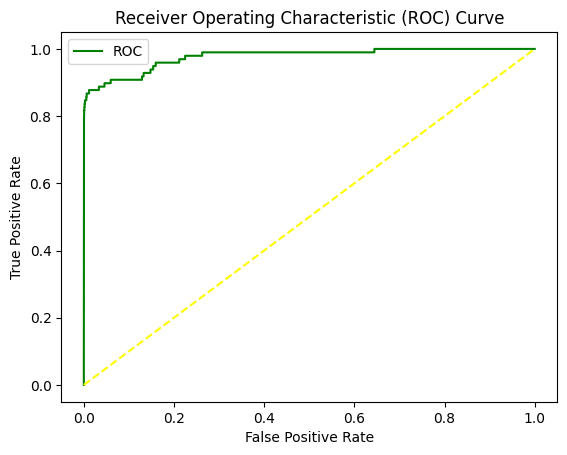

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.88      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.54     56962
weighted avg       1.00      0.97      0.98     56962



0.9770868445155214

In [42]:
# Initializing the Logistic Regression model with L2 regularization and a specific C value
lsr_best = LogisticRegression(penalty='l2', C=0.01, random_state=0)

# Fitting the model to the resampled training data (X_sm, y_sm)
lsr_sm = lsr_best.fit(X_sm, y_sm)

# Evaluating the model's performance on the test dataset
clf_score(lsr_sm)


##Evaluating Logistic Regression with ADASYN Resampled Data

AUC: 0.97


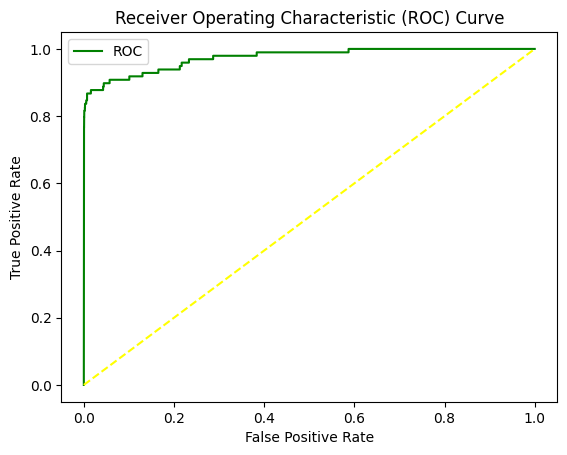

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56864
           1       0.02      0.91      0.04        98

    accuracy                           0.92     56962
   macro avg       0.51      0.91      0.50     56962
weighted avg       1.00      0.92      0.96     56962



0.9743360994510353

In [43]:
# Fitting the Logistic Regression model to the ADASYN resampled training data (X_ada, y_ada)
lsr_ada = lsr_best.fit(X_ada, y_ada)

# Evaluating the model's performance on the test dataset
clf_score(lsr_ada)




*   AUC & Recall both are better on SMOTE.
*   But the f1-score is extremely low. Model is overfitting.



##Evaluating K-Nearest Neighbors (KNN) with SMOTE Resampled Data

AUC: 0.92


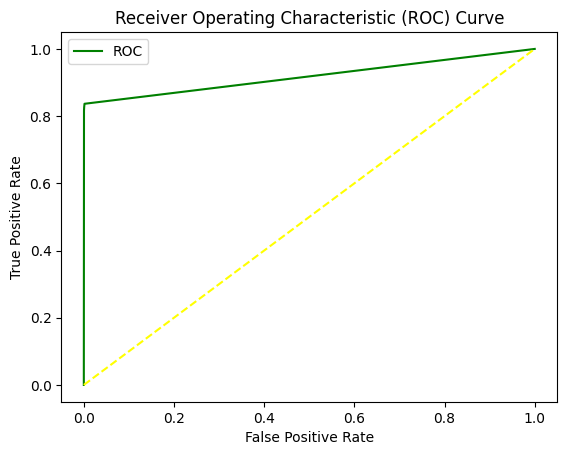

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.83      0.73        98

    accuracy                           1.00     56962
   macro avg       0.82      0.91      0.86     56962
weighted avg       1.00      1.00      1.00     56962



0.9180668627186384

In [44]:
# Initializing the K-Nearest Neighbors classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fitting the model to the SMOTE-resampled training data (X_sm, y_sm)
knn_sm = knn.fit(X_sm, y_sm)

# Evaluating the model's performance on the test dataset
clf_score(knn_sm)


##Evaluating K-Nearest Neighbors (KNN) with ADASYN Resampled Data

AUC: 0.92


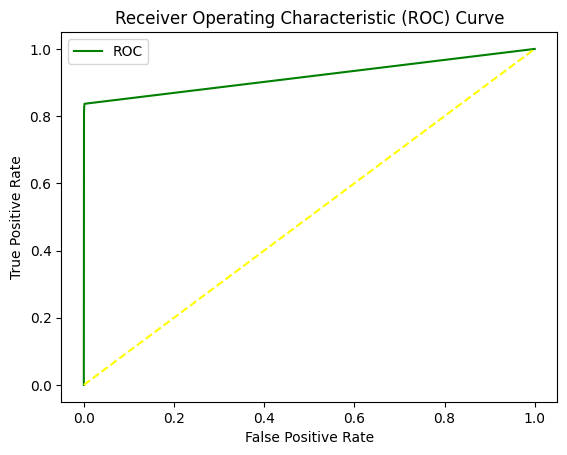

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.83      0.73        98

    accuracy                           1.00     56962
   macro avg       0.82      0.91      0.86     56962
weighted avg       1.00      1.00      1.00     56962



0.9180629148817658

In [45]:
# Initializing the K-Nearest Neighbors classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fitting the model to the ADASYN-resampled training data (X_ada, y_ada)
knn_ada = knn.fit(X_ada, y_ada)

# Evaluating the model's performance on the test dataset
clf_score(knn_ada)


* Same on both SMOTE and ADASYN.

##Evaluating Decision Tree Classifier with SMOTE Resampled Data


AUC: 0.92


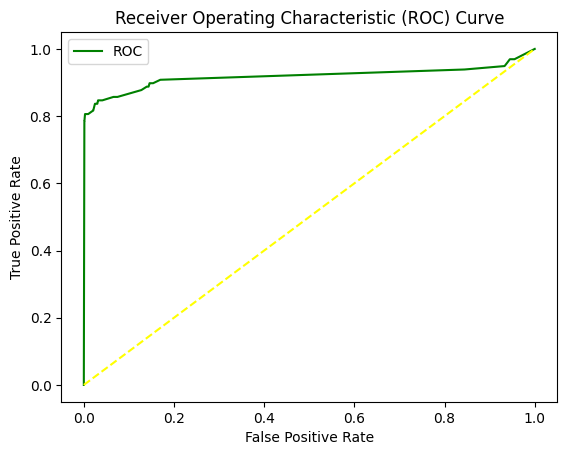

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56864
           1       0.04      0.85      0.08        98

    accuracy                           0.97     56962
   macro avg       0.52      0.91      0.53     56962
weighted avg       1.00      0.97      0.98     56962



0.9177759789199867

In [46]:
# Initializing the Decision Tree classifier with a maximum depth of 6
dt = tree.DecisionTreeClassifier(max_depth=6)

# Fitting the model to the SMOTE-resampled training data (X_sm, y_sm)
dt_sm = dt.fit(X_sm, y_sm)

# Evaluating the model's performance on the test dataset
clf_score(dt_sm)


##Evaluating Decision Tree Classifier with ADASYN Resampled Data


AUC: 0.92


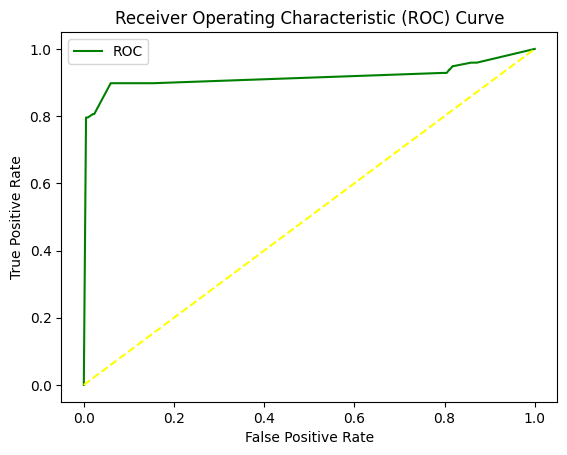

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     56864
           1       0.02      0.90      0.04        98

    accuracy                           0.92     56962
   macro avg       0.51      0.91      0.50     56962
weighted avg       1.00      0.92      0.96     56962



0.9162462818554545

In [47]:
# Initializing the Decision Tree classifier with a maximum depth of 6
dt = tree.DecisionTreeClassifier(max_depth=6)

# Fitting the model to the ADASYN-resampled training data (X_ada, y_ada)
dt_ada = dt.fit(X_ada, y_ada)

# Evaluating the model's performance on the test dataset
clf_score(dt_ada)


* The Precision is extremely low in both, resulting in low f1-score. So the model is not good enough.

##Evaluating Random Forest Classifier with SMOTE Resampled Data


AUC: 0.98


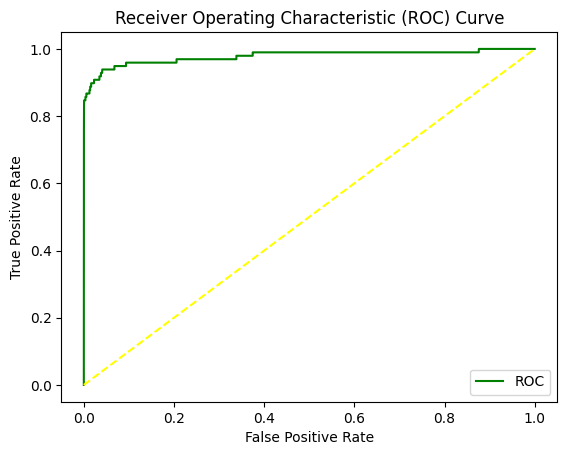

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.37      0.85      0.52        98

    accuracy                           1.00     56962
   macro avg       0.69      0.92      0.76     56962
weighted avg       1.00      1.00      1.00     56962



0.9780626780115536

In [48]:
# Initializing the Random Forest classifier with a maximum depth of 9 and 30 trees
rf = RandomForestClassifier(max_depth=9, n_estimators=30)

# Fitting the model to the SMOTE-resampled training data (X_sm, y_sm)
RFC_sm = rf.fit(X_sm, y_sm)

# Evaluating the model's performance on the test dataset
clf_score(RFC_sm)


##Evaluating Random Forest Classifier with ADASYN Resampled Data




AUC: 0.98


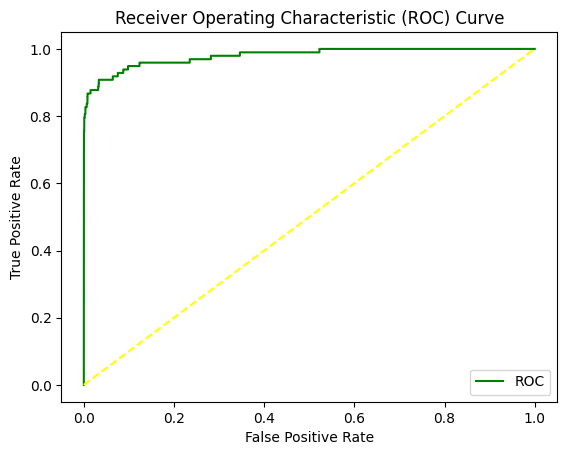

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.88      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



0.9796058336108783

In [49]:
# Initializing the Random Forest classifier with a maximum depth of 9 and 30 trees
rf = RandomForestClassifier(max_depth=9, n_estimators=30)

# Fitting the model to the ADASYN-resampled training data (X_ada, y_ada)
RFC_ada = rf.fit(X_ada, y_ada)

# Evaluating the model's performance on the test dataset
clf_score(RFC_ada)


* Random Forest performs better on SMOTE.
* Low f1-score so the model is not good enough.

##XGBoost

###Converting Resampled Datasets to DataFrames

In [50]:
# Converting the SMOTE-resampled feature set to a DataFrame and assigning column names
X_sm = pd.DataFrame(X_sm)  # Convert to DataFrame
X_sm.columns = cols        # Assign column names

# Converting the ADASYN-resampled feature set to a DataFrame and assigning column names
X_ada = pd.DataFrame(X_ada)  # Convert to DataFrame
X_ada.columns = cols         # Assign column names


###Training the XGBoost Classifier with SMOTE Resampled Data

AUC: 0.98


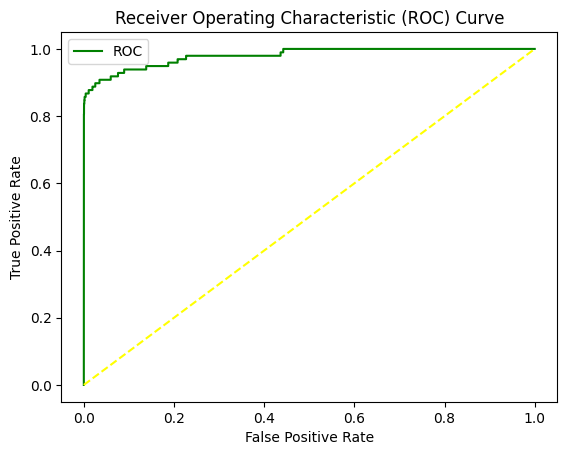

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.82      0.78        98

    accuracy                           1.00     56962
   macro avg       0.88      0.91      0.89     56962
weighted avg       1.00      1.00      1.00     56962



0.9799656251076683

In [51]:
# Initialize the XGBoost Classifier with specified hyperparameters
xgbst = XGBClassifier(n_estimators=150, max_depth=5, min_child_weight=3)

# Fit the model to the SMOTE-resampled training data
xgb_sm = xgbst.fit(X_sm, y_sm)

# Evaluate the performance of the fitted model using the clf_score function
clf_score(xgb_sm)


###Training the XGBoost Classifier with ADASYN Resampled Data

AUC: 0.98


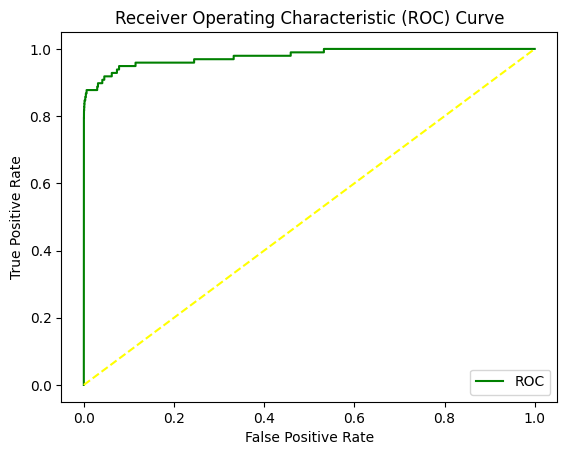

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.65      0.82      0.72        98

    accuracy                           1.00     56962
   macro avg       0.83      0.91      0.86     56962
weighted avg       1.00      1.00      1.00     56962



0.9789533638441308

In [52]:
# Initialize the XGBoost Classifier with specified hyperparameters
xgbst = XGBClassifier(n_estimators=150, max_depth=5, min_child_weight=3)

# Fit the model to the ADASYN-resampled training data
xgb_ada = xgbst.fit(X_ada, y_ada)

# Evaluate the performance of the fitted model using the clf_score function
clf_score(xgb_ada)


* AUC is similar in both resampled data scenarios
* So the XGBoost model with SMOTE oversampling is our final model.